In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

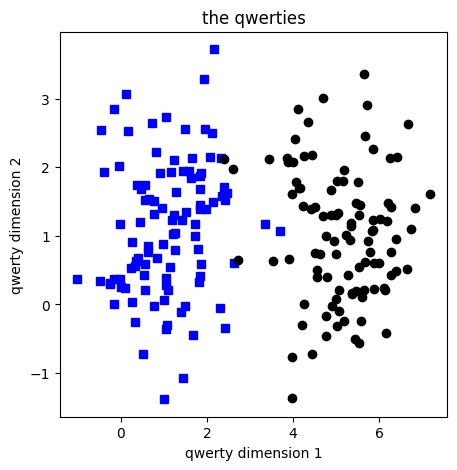

In [4]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('the qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [5]:
#model = nn.Sequential(
#    nn.Linear(2,1)
#    nn.ReLU(),
#    nn.Linear(1,1),
#    nn.Sigmoid()
#)

In [6]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(2,1)

        self.output = nn.Linear(1,1)

    def forward(self, x):
        x = F.relu(self.input(x))

        x = self.output(x)
        x = torch.sigmoid(x)

        return x

ANNclassify = CustomModel()

In [7]:
learning_rate = .01

lossfun = nn.BCELoss()

optimizer = torch.optim.SGD(params=ANNclassify.parameters(), lr=learning_rate)

In [9]:
numEpochs = 1000
losses = torch.zeros(numEpochs)

for epochi in range(numEpochs):
    yHat = ANNclassify(data)

    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

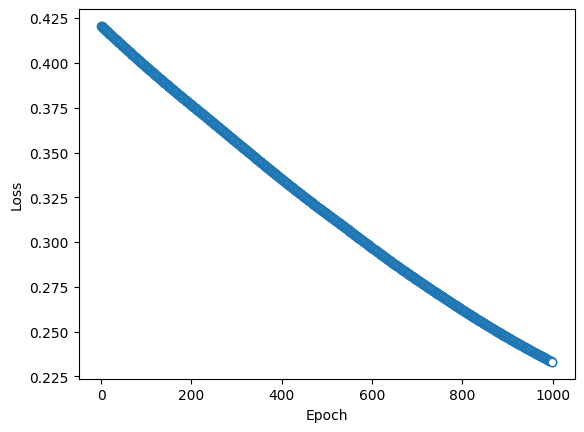

In [10]:
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [11]:
predictions = ANNclassify(data)

predlabels = predictions > .5

misclassified = np.where(predlabels != labels)[0]

totalacc = 100 - 100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 97%


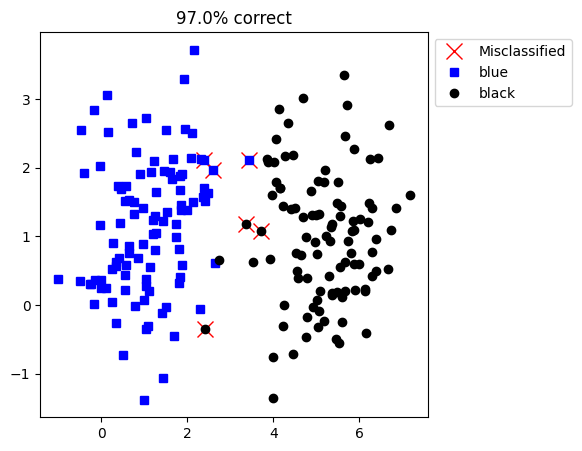

In [14]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize=12)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')

plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()